In [3]:
import lightgbm as lgb
from sklearn.datasets import load_iris
import pandas as pd

In [25]:
iris = load_iris()
df_data = pd.DataFrame(iris.data, columns=iris.feature_names)
print(f"the numbers of (data, features) : {df_data.shape}")
df_data.head()

the numbers of (data, features) : (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [60]:
df_label_name = pd.Series(iris.target_names)
df_label = pd.Series(iris.target)
df_label.replace([0,1,2], df_label_name).value_counts()

versicolor    50
setosa        50
virginica     50
dtype: int64

In [26]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [98]:
from sklearn.model_selection import train_test_split
X = df_data
y = df_label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=1)
print(f"the numbers of train data : {X_train.shape}, validation data : {X_val.shape}, test data : {X_test.shape}")

the numbers of train data : (63, 4), validation data : (27, 4), test data : (60, 4)


In [111]:
#make input formatted data
lgb_train = lgb.Dataset(X_train, y_train)
#make validation formatted data
lgb_val = lgb.Dataset(X_val, y_val, reference=lgb_train)
#hyper parameters
params = {
    "objective":"multiclass",
    "task":"train",
    "num_class":3,
    "metric":"multi_logloss",
    "num_leaves":70
}
#training, then make a model
gbm = lgb.train(params, lgb_train, num_boost_round=100, valid_sets=lgb_val, early_stopping_rounds=10)

[1]	valid_0's multi_logloss: 0.996395
Training until validation scores don't improve for 10 rounds.
[2]	valid_0's multi_logloss: 0.884883
[3]	valid_0's multi_logloss: 0.793054
[4]	valid_0's multi_logloss: 0.710339
[5]	valid_0's multi_logloss: 0.641409
[6]	valid_0's multi_logloss: 0.579501
[7]	valid_0's multi_logloss: 0.523571
[8]	valid_0's multi_logloss: 0.476738
[9]	valid_0's multi_logloss: 0.432666
[10]	valid_0's multi_logloss: 0.395741
[11]	valid_0's multi_logloss: 0.360569
[12]	valid_0's multi_logloss: 0.331141
[13]	valid_0's multi_logloss: 0.302797
[14]	valid_0's multi_logloss: 0.279148
[15]	valid_0's multi_logloss: 0.258747
[16]	valid_0's multi_logloss: 0.239594
[17]	valid_0's multi_logloss: 0.222956
[18]	valid_0's multi_logloss: 0.207239
[19]	valid_0's multi_logloss: 0.191337
[20]	valid_0's multi_logloss: 0.179497
[21]	valid_0's multi_logloss: 0.16758
[22]	valid_0's multi_logloss: 0.157193
[23]	valid_0's multi_logloss: 0.148114
[24]	valid_0's multi_logloss: 0.139413
[25]	valid_0

In [115]:
import numpy as np
#array of probability for each label 0:virginica, 1:setosa, 2:versicolor
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
#get highest value from probability array(y_pred), then it becomes the output predicted value
y_pred = np.argmax(y_pred, axis=1)

In [113]:
from sklearn.metrics import accuracy_score
#calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
str(round(accuracy, 3)*100) + "%"

'96.7%'

Text(91.68, 0.5, 'actual value')

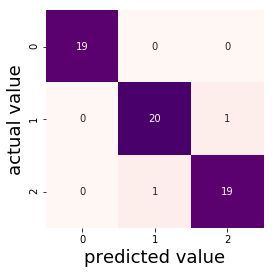

In [114]:
#make confusin matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, square=True, annot=True, cbar=False, fmt="d", cmap="RdPu")
plt.xlabel("predicted value", fontsize=18)
plt.ylabel("actual value", fontsize=18)